In [2]:
import pandas as pd

# Load the CSV file
file_path = 'ILB_APs.csv'
data = pd.read_csv(file_path)

# Initialize a dictionary to store rheobase values
rheobase_dict = {}

# Loop through each column (skip the first column as it is the current)
for column in data.columns[1:]:
    # Find the first non-zero value in the column
    for i, value in enumerate(data[column]):
        if value != 0:
            rheobase_dict[column] = data.iloc[i, 0]  # Get the corresponding current value from the first column
            break

# Convert the dictionary to a DataFrame for better visualization
rheobase_df = pd.DataFrame(list(rheobase_dict.items()), columns=['File', 'Rheobase (pA)'])

# Display the results
print(rheobase_df)

# Save the results to a new CSV file
rheobase_df.to_csv('rheobase_results.csv', index=False)


                     File  Rheobase (pA)
0   HS23_IL16_09_0000.abf            260
1   HS23_IL16_10_0000.abf            650
2   HS23_IL16_11_0000.abf            350
3   HS23_IL16_12_0000.abf             10
4   HS23_IL16_13_0000.abf            510
5   HS23_IL16_14_0000.abf            590
6   HS23_IL16_15_0000.abf            170
7   HS23_IL16_27_0000.abf            270
8   HS23_IL16_28_0000.abf            500
9   HS23_IL16_29_0000.abf           2070
10  HS23_IL16_30_0000.abf            590
11  HS23_IL16_31_0000.abf             30
12  HS23_IL16_32_0000.abf            200
13  HS23_IL16_33_0000.abf            310
14  HS23_IL16_34_0000.abf             50
15  HS23_IL16_35_0000.abf            120
16  HS23_IL16_36_0000.abf            520
17   HS23_IL3_02_0000.abf           1890
18   HS23_IL3_03_0000.abf            350
19   HS23_IL3_04_0000.abf            180
20   HS23_IL3_20_0000.abf             20
21   HS23_IL3_21_0000.abf            510
22   HS23_IL3_22_0000.abf            280
23   HS23_IL3_23

In [10]:
import pandas as pd

# Load the CSV file
file_path = 'ILB_APs.csv'  # Replace with the path to your actual CSV file
data = pd.read_csv(file_path)

# Initialize a dictionary to store rheobase values
rheobase_dict = {}

# Loop through each column (skip the first column as it is the current)
for column in data.columns[1:]:
    # Find the first non-zero value in the column
    for i, value in enumerate(data[column]):
        if value != 0:
            rheobase_dict[column] = data.iloc[i, 0]  # Get the corresponding current value from the first column
            break

# Initialize a list to store the results
results = []

# Define the multiples of rheobase to consider
multiples = [1, 1.5, 2, 2.5,  3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

# Create the DataFrame
for column in data.columns[1:]:
    rheobase = rheobase_dict[column]
    ap_values = data[column]
    
    # Create a row for the current column
    row = {'File': column}
    
    for multiple in multiples:
        target_current = multiple * rheobase
        # Find the closest index to the target current value
        closest_index = (data.iloc[:, 0] - target_current).abs().idxmin()
        row[f'{multiple}X Rheobase'] = data.iloc[closest_index, data.columns.get_loc(column)]
    
    results.append(row)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Save the results to a new CSV file
results_df.to_csv('ap_vs_rheobase_multiples.csv', index=False)


                     File  1X Rheobase  1.5X Rheobase  2X Rheobase  \
0   HS23_IL16_09_0000.abf          1.0            1.0          2.0   
1   HS23_IL16_10_0000.abf          1.0            2.0          3.0   
2   HS23_IL16_11_0000.abf          1.0            1.0          1.0   
3   HS23_IL16_12_0000.abf          1.0            1.0          0.0   
4   HS23_IL16_13_0000.abf          1.0            1.0          2.0   
5   HS23_IL16_14_0000.abf          1.0            1.0          1.0   
6   HS23_IL16_15_0000.abf          1.0            1.0          2.0   
7   HS23_IL16_27_0000.abf          1.0            1.0          1.0   
8   HS23_IL16_28_0000.abf          1.0            1.0          1.0   
9   HS23_IL16_29_0000.abf          1.0            1.0          NaN   
10  HS23_IL16_30_0000.abf          1.0            1.0          1.0   
11  HS23_IL16_31_0000.abf          1.0            1.0          1.0   
12  HS23_IL16_32_0000.abf          1.0            1.0          1.0   
13  HS23_IL16_33_000

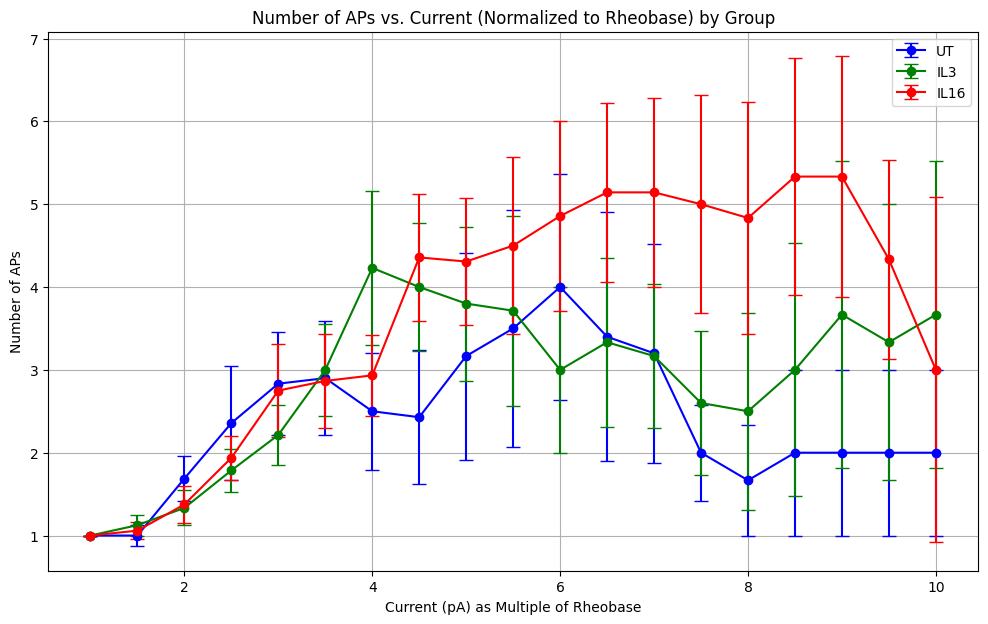

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file with the results
file_path = 'ap_vs_rheobase_multiples.csv'  # Replace with your actual CSV file path
results_df = pd.read_csv(file_path)

# Initialize lists for different groups
group_ut = []
group_il3 = []
group_il16 = []

# Split results into groups based on filename
for _, row in results_df.iterrows():
    if 'UT' in row['File']:
        group_ut.append(row)
    elif 'IL3' in row['File']:
        group_il3.append(row)
    elif 'IL16' in row['File']:
        group_il16.append(row)

# Convert lists to DataFrames
df_ut = pd.DataFrame(group_ut)
df_il3 = pd.DataFrame(group_il3)
df_il16 = pd.DataFrame(group_il16)


# Define the multiples of rheobase to consider
multiples = [1, 1.5, 2, 2.5,  3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

# Function to calculate mean and SEM
def calculate_mean_sem(group_df):
    means = []
    sems = []
    for multiple in multiples:
        column_name = f'{multiple}X Rheobase'
        if column_name in group_df.columns:
            values = group_df[column_name]
            means.append(values.mean())
            sems.append(values.sem())
        else:
            means.append(np.nan)
            sems.append(np.nan)
    return means, sems

# Calculate mean and SEM for each group
ut_means, ut_sems = calculate_mean_sem(df_ut)
il3_means, il3_sems = calculate_mean_sem(df_il3)
il16_means, il16_sems = calculate_mean_sem(df_il16)

# Plotting
plt.figure(figsize=(12, 7))

# Plot each group with error bars and connecting lines
plt.errorbar(multiples, ut_means, yerr=ut_sems, fmt='o-', capsize=5, label='UT', color='blue')
plt.errorbar(multiples, il3_means, yerr=il3_sems, fmt='o-', capsize=5, label='IL3', color='green')
plt.errorbar(multiples, il16_means, yerr=il16_sems, fmt='o-', capsize=5, label='IL16', color='red')

plt.xlabel('Current (pA) as Multiple of Rheobase')
plt.ylabel('Number of APs')
plt.title('Number of APs vs. Current (Normalized to Rheobase) by Group')
plt.legend()
plt.grid(True)
plt.show()
